In [136]:
import os
import BiCEP_functions as BiCEP
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [137]:
data=BiCEP.ThellierData('arai_data_merged.csv')

In [138]:
sites_success=[]
for fname in os.listdir():
    if '.nc' in fname:
        sites_success.append(fname.split('.')[0])

In [141]:
specimens_table=pd.read_csv('specimens.txt',sep='\t',skiprows=1)
specimens_table['int_mad_coe']=np.nan
specimens_table

,aniso_alt,aniso_ftest,aniso_ftest12,aniso_ftest23,aniso_ftest_quality,aniso_p,aniso_s,aniso_s_n_measurements,aniso_s_sigma,aniso_tilt_correction,...,int_treat_dc_field,meas_step_max,meas_step_min,meas_step_unit,method_codes,result_quality,sample,software_packages,specimen,int_mad_coe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW300A,NaN,HW300A01,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW300A,NaN,HW300A02,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW301A,NaN,HW301A01,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW301A,NaN,HW301A02,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW301B,NaN,HW301B01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI47A,NaN,GHI47A01,NaN
2891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI47D,NaN,GHI47D01,NaN
2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI48D,NaN,GHI48D02,NaN
2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI49A,NaN,GHI49A01,NaN


In [150]:
def get_mad_coe(specimen):
    IZZI_trunc=specimen.IZZI_trunc
    ZI=IZZI_trunc[IZZI_trunc.steptype=='ZI']
    pca=PCA(n_components=3)
    MAD_coe=BiCEP.get_mad(ZI,pca)
    return(MAD_coe)
for site in sites_success:
    for specimen in data[site].specimens.values():
        if specimen.active==True:
            specimens_table.loc[specimens_table.specimen==specimen.name,'int_mad_coe']=get_mad_coe(specimen)
            specimens_table.loc[specimens_table.specimen==specimen.name,'int_mad_free']=specimen.mad
            specimens_table.loc[specimens_table.specimen==specimen.name,'int_drat']=specimen.drat
            specimens_table.loc[specimens_table.specimen==specimen.name,'int_dang']=specimen.dang
            
    

In [167]:
specimens_table.loc[specimens_table['int_abs']<0,'int_abs']=0
specimens_table.loc[specimens_table['int_abs_min']<0,'int_abs_min']=0
specimens_table.loc[specimens_table['int_abs_max']<0,'int_abs_max']=0

In [168]:
specimens_table

,aniso_alt,aniso_ftest,aniso_ftest12,aniso_ftest23,aniso_ftest_quality,aniso_p,aniso_s,aniso_s_n_measurements,aniso_s_sigma,aniso_tilt_correction,...,int_treat_dc_field,meas_step_max,meas_step_min,meas_step_unit,method_codes,result_quality,sample,software_packages,specimen,int_mad_coe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW300A,NaN,HW300A01,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW300A,NaN,HW300A02,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW301A,NaN,HW301A01,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW301A,NaN,HW301A02,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM:LP-PI-BT-IZZI:LP-PI-ALT-PTRM,NaN,HW301B,NaN,HW301B01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI47A,NaN,GHI47A01,NaN
2891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI47D,NaN,GHI47D01,NaN
2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI48D,NaN,GHI48D02,NaN
2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Kelvin,LP-PI-TRM,NaN,GHI49A,NaN,GHI49A01,NaN


In [170]:
from pmagpy import pmag

In [172]:
specimenstable=specimens_table.fillna('')
specimensdict=specimenstable.to_dict('records')
pmag.magic_write('specimens.txt',specimensdict,'specimens')
!combine_magic.py

2895  records written to file  specimens.txt
-W- cartopy is not installed
    If you want to make maps, install using conda:
    conda install cartopy
-W- You haven't installed a module for plotting maps (cartopy or Basemap)
    Recommended: install cartopy.  With conda:
    conda install cartopy
    For more information, see http://earthref.org/PmagPy/Cookbook#getting_python
Traceback (most recent call last):
  File "/home/brendan/PmagPy/programs/combine_magic.py", line 65, in <module>
    main()
  File "/home/brendan/PmagPy/programs/combine_magic.py", line 58, in main
    args = extractor.extract_and_check_args(sys.argv, dataframe)
  File "/home/brendan/PmagPy/pmagpy/command_line_extractor.py", line 88, in extract_and_check_args
    checked_args = check_args(arguments, dataframe)
  File "/home/brendan/PmagPy/pmagpy/command_line_extractor.py", line 71, in check_args
    raise pmag.MissingCommandLineArgException("-"+arg)
pmagpy.pmag.MissingCommandLineArgException: -f is a required opti

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

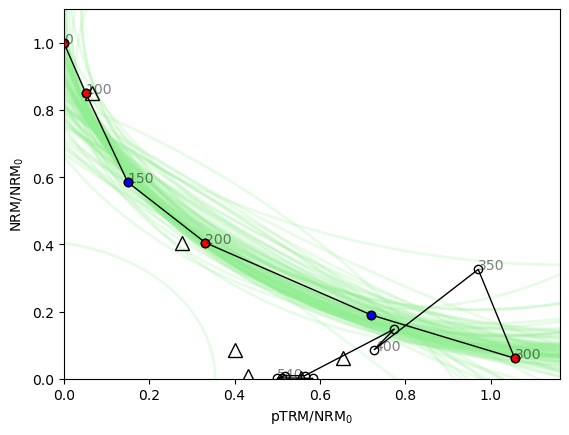

In [174]:
data['GHI05']['GHI05A03'].plot_arai(plt.gca())
data['GHI05']['GHI05A03'].plot_circ(plt.gca())
#data['GHI05']['GHI05B02'].plot_zijd(plt.gca())

In [176]:
from pmagpy.ipmag import upload_magic

In [178]:
!mkdir magic_upload

In [184]:
upload_magic(dir_path='magic_upload')

-I- /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/locations.txt file successfully read in
3  records written to file  /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/magic_upload/upload.txt
-I- /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/locations.txt written to  /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/magic_upload/upload.txt
-I- /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/samples.txt file successfully read in
1339  records written to file  /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/magic_upload/upload.txt
-I- /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/samples.txt written to  /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/magic_upload/upload.txt
-I- /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/specimens.txt file successfully read in
2895  records written to file  /home/brendan/Dropbox/Apps/Overleaf/Hawaiian Paleointensity/magic_upload/upload.txt
-I

(False, 'Could not create an upload file', None, None)

In [182]:
help(upload_magic)

Help on function upload_magic in module pmagpy.ipmag:

upload_magic(concat=False, dir_path='.', input_dir_path='.', validate=True, verbose=True)
    Finds all magic files in a given directory, and compiles them into an
    upload.txt file which can be uploaded into the MagIC database.
    If username/password set, then data will be uploaded to private workspace, otherwise
    validation will be done on this computer.
    
    Parameters
    ----------
    concat : boolean where True means do concatenate to upload.txt file in dir_path,
        False means write a new file (default is False)
    dir_path : string for output directory (default ".")
    input_dir_path : str, default "."
    validate : boolean
        validate upload file on MagIC's public endpoint
    verbose : boolean
        if True print progress and validation results
    Returns
    ----------
    tuple of either: True/False or (False, error_message, validation dictionary val_response['validation'])
    if there was a